In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import scipy.signal as signal
import time

In [2]:
data = pd.read_csv('/home/weijunfei/NAB-master_new/data/artificialWithAnomaly/art_daily_flatmiddle.csv')
data.head()

,timestamp,value
0,2014-04-01 00:00:00,-21.048383
1,2014-04-01 00:05:00,-20.295477
2,2014-04-01 00:10:00,-18.127229
3,2014-04-01 00:15:00,-20.171665
4,2014-04-01 00:20:00,-21.223762


In [3]:
X = data.value.values

In [4]:
kde = KernelDensity()
kde_fit = kde.fit(X.reshape(-1,1))

In [5]:
np.min(data.value)

-21.998788838600007

[-19.77777778  -7.55555556   0.22222222  40.22222222  55.77777778
  59.11111111  61.33333333  74.66666667  76.88888889  82.44444444]
running time0.04272794723510742 s


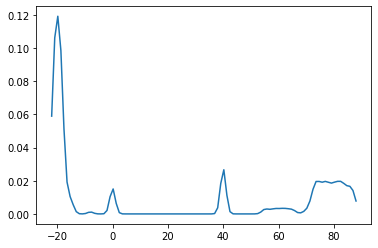

In [6]:
start = time.time()
bw = 1 
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X.reshape(-1,1)) 
estimator = np.linspace(-22, 88, 100) 
kde_est = np.exp(kde.score_samples(estimator.reshape(-1, 1))) 

plt.plot(estimator, kde_est) 
peaks_pos = signal.argrelextrema(kde_est, np.greater)[0]  ## 寻找离散序列的极值点
print(estimator[peaks_pos]) 
end = time.time()
print('running time'+ str((end - start)) +' s')

In [ ]:
start = time.time()
bandwidths = 10 ** np.linspace(-1,1,100)
grid = GridSearchCV(KernelDensity(),{ 'bandwidth' : bandwidths, 'kernel' : ['gaussian','tophat','epanechnikov','exponential','linear','cosine']} ,cv =LeaveOneOut())
grid.fit(X.reshape(-1,1))
end = time.time()
print('running time:'+ str((end - start)) +' s')

In [ ]:
grid.best_params_

In [ ]:
grid = KernelDensity(kernel = grid.best_params_['kernel'], bandwidth = grid.best_params_['bandwidth']).fit(X.reshape(-1,1))
estimator = np.linspace(-22,88,100)
grid_est = np.exp(grid.score_samples(estimator.reshape(-1,1)))
plt.plot(estimator, grid_est)
peaks_pos = signal.argrelextrema(grid_est, np.greater)[0]
print(estimator[peaks_pos])

### 以小时聚合

In [ ]:
data.timestamp = pd.to_datetime(data.timestamp)

In [ ]:
data = data.set_index('timestamp', drop = True)

In [ ]:
data_H = data.resample(rule = '1H').mean()

In [ ]:
X_H = data_H.value.values

In [ ]:
bw = 1 
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X_H.reshape(-1,1)) 
estimator = np.linspace(-22, 88, 100) 
kde_est = np.exp(kde.score_samples(estimator.reshape(-1, 1))) 

plt.plot(estimator, kde_est) 
peaks_pos = signal.argrelextrema(kde_est, np.greater)[0] 
print(estimator[peaks_pos]) 

In [ ]:
start = time.time()
bandwidths = 10 ** np.linspace(-1,1,100)
grid = GridSearchCV(KernelDensity(),{'bandwidth' : bandwidths, 'kernel' : ['gaussian','tophat','epanechnikov','exponential','linear','cosine']} ,cv =LeaveOneOut())
grid.fit(X_H.reshape(-1,1))
end = time.time()
print('running time:'+ str((end - start)) +' s')

In [ ]:
grid.best_params_

In [ ]:
grid = KernelDensity(kernel = grid.best_params_['kernel'], bandwidth = grid.best_params_['bandwidth']).fit(X.reshape(-1,1))
estimator = np.linspace(-22,88,100)
grid_est = np.exp(grid.score_samples(estimator.reshape(-1,1)))
plt.plot(estimator, grid_est)
peaks_pos = signal.argrelextrema(grid_est, np.greater)[0]
print(estimator[peaks_pos])

### 以天聚合

In [ ]:
data_D = data.resample(rule = '1D').mean()

In [ ]:
X_D = data_D.value.values

In [ ]:
X_D

In [ ]:
bw = 1 
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X_D.reshape(-1,1)) 
estimator = np.linspace(-22, 88, 100) 
kde_est = np.exp(kde.score_samples(estimator.reshape(-1, 1))) 

plt.plot(estimator, kde_est) 

peaks_pos = signal.argrelextrema(kde_est, np.greater)[0] 

print(estimator[peaks_pos]) 

In [ ]:
start = time.time()
bandwidths = 10 ** np.linspace(-1,1,100)
grid = GridSearchCV(KernelDensity(),{ 'bandwidth' : bandwidths, 'kernel' : ['gaussian','tophat','epanechnikov','exponential','linear','cosine']} ,cv =LeaveOneOut())
grid.fit(X_D.reshape(-1,1))
end = time.time()
print('running time:'+ str((end - start)) +' s')

In [ ]:
grid.best_params_

In [ ]:
grid_D = KernelDensity(kernel = grid.best_params_['kernel'], bandwidth = grid.best_params_['bandwidth']).fit(X.reshape(-1,1))
estimator = np.linspace(-22,88,100)
grid_est = np.exp(grid_D.score_samples(estimator.reshape(-1,1)))
plt.plot(estimator, grid_est)
peaks_pos = signal.argrelextrema(grid_est, np.greater)[0]
print(estimator[peaks_pos])

### 按天聚合

In [14]:
data = pd.read_csv('/home/weijunfei/NAB-master_new/data/realTraffic/speed_6005.csv')
data.head()

,timestamp,value
0,2015-08-31 18:22:00,90
1,2015-08-31 18:32:00,80
2,2015-08-31 18:57:00,84
3,2015-08-31 19:07:00,94
4,2015-08-31 19:12:00,90


In [15]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [16]:
data['date'] = data['timestamp'].dt.date

In [17]:
data.head()

,timestamp,value,date
0,2015-08-31 18:22:00,90,2015-08-31
1,2015-08-31 18:32:00,80,2015-08-31
2,2015-08-31 18:57:00,84,2015-08-31
3,2015-08-31 19:07:00,94,2015-08-31
4,2015-08-31 19:12:00,90,2015-08-31


In [18]:
data_date = data[['value','date']]

In [19]:
data_date = data_date.groupby('date').mean()

In [8]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 2).fit(data_date['value'].values.reshape(-1,1))
kde.score_samples(data_date['value'].values.reshape(-1,1))
data_date['score'] = np.exp(kde.score_samples(data_date['value'].values.reshape(-1,1)))

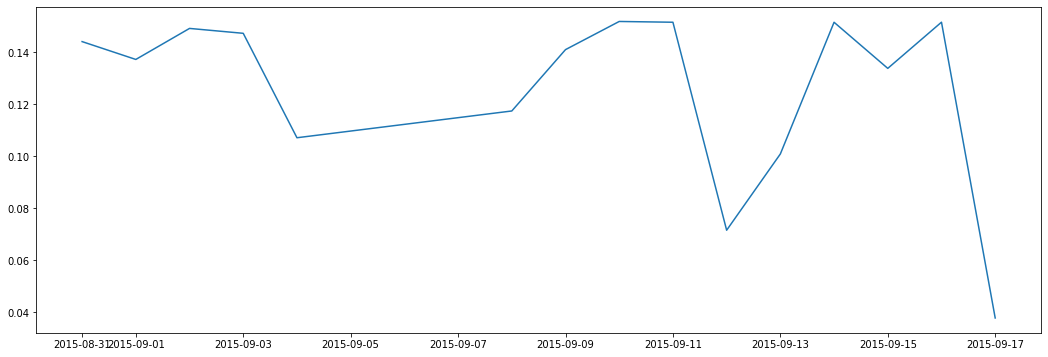

In [9]:
fig,ax = plt.subplots(figsize = (18,6))
ax.plot(data_date.index,data_date['score'])

In [15]:
start = time.time()
bandwidths = 10 ** np.linspace(-1,1,100)
grid = GridSearchCV(KernelDensity(),{ 'bandwidth' : bandwidths, 'kernel' : ['gaussian','tophat','epanechnikov','exponential','linear','cosine']} ,cv =LeaveOneOut())
grid.fit(data_date['value'].values.reshape(-1,1))
end = time.time()
print('running time:'+ str((end - start)) +' s')

running time:6.3139379024505615 s


/home/weijunfei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


In [16]:
grid.best_params_

{'bandwidth': 0.9770099572992254, 'kernel': 'exponential'}

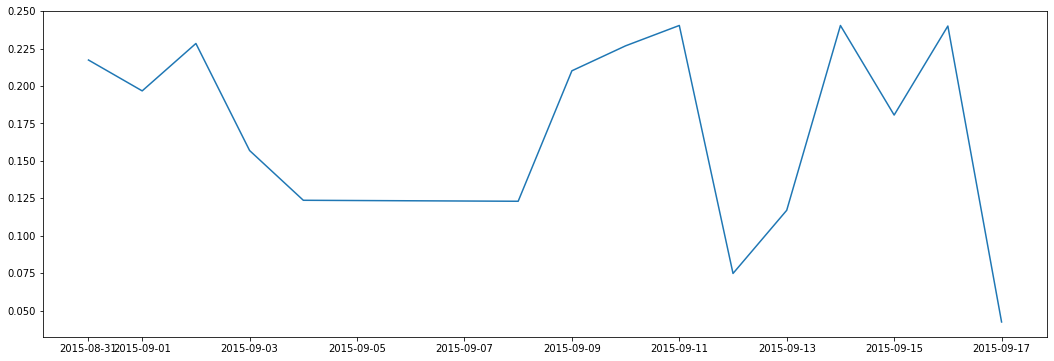

In [17]:
kde = KernelDensity(kernel = grid.best_params_['kernel'], bandwidth = 0.9770099572992254).fit(data_date['value'].values.reshape(-1,1))
kde.score_samples(data_date['value'].values.reshape(-1,1))
data_date['score'] = np.exp(kde.score_samples(data_date['value'].values.reshape(-1,1)))
fig,ax = plt.subplots(figsize = (18,6))
ax.plot(data_date.index,data_date['score'])

In [19]:
data_date.head()

,value,score
date,,
2015-08-31,81.043478,0.217329
2015-09-01,80.734694,0.196722
2015-09-02,81.375723,0.228359
2015-09-03,82.480663,0.156893
2015-09-04,84.068182,0.123692


In [18]:
from scipy import interpolate

In [22]:
data_date['datetime'] = pd.to_datetime(data_date.index)
data_date['timestamp'] = data_date.datetime.apply(lambda x :int(time.mktime(x.timetuple())))
data_date.head()

,value,score,datetime,timestamp
date,,,,
2015-08-31,81.043478,0.217329,2015-08-31,1440950400
2015-09-01,80.734694,0.196722,2015-09-01,1441036800
2015-09-02,81.375723,0.228359,2015-09-02,1441123200
2015-09-03,82.480663,0.156893,2015-09-03,1441209600
2015-09-04,84.068182,0.123692,2015-09-04,1441296000


Text(0, 0.5, 'probablity')

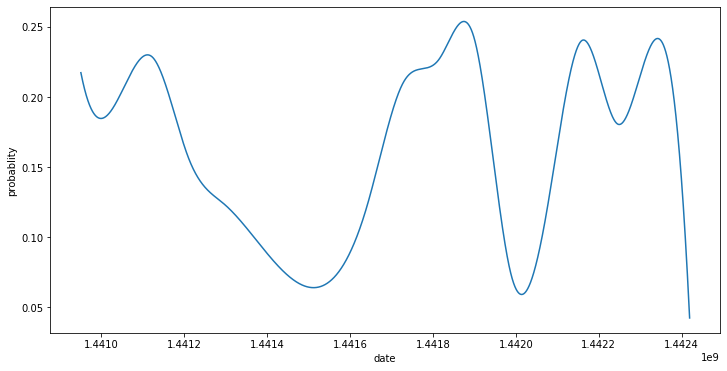

In [21]:
xnew =np.arange(np.min(data_date['timestamp']),np.max(data_date['timestamp']),1)
func = interpolate.interp1d(data_date.timestamp,data_date['score'].values,kind='cubic')
ynew = func(xnew)
fig = plt.figure(figsize = (12,6))
plt.plot(xnew,ynew)
#plt.xticks(list(data_date['value'].values),list(data_date['datetime'].astype('str').values), size=14, color='grey')
plt.xlabel('date')
plt.ylabel('probablity')

#### HOUR

In [ ]:
data['hour'] = data['timestamp'].dt.hour

In [ ]:
data_hour = data[['hour','value']]
data_hour = data_hour.groupby('hour').mean()

In [ ]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 2).fit(data_hour['value'].values.reshape(-1,1))
kde.score_samples(data_hour['value'].values.reshape(-1,1))
data_hour['score'] = np.exp(kde.score_samples(data_hour['value'].values.reshape(-1,1)))
data_hour.head()

In [ ]:
fig,ax = plt.subplots(figsize = (12,6))
ax.plot(data_hour.index,data_hour['score'])

In [ ]:
from scipy import interpolate

In [ ]:
xnew =np.arange(0,23,0.1)
func = interpolate.interp1d(data_hour.index,data_hour['score'].values,kind='cubic')
ynew = func(xnew)
plt.plot(xnew,ynew)
plt.xlabel('hour')
plt.ylabel('probablity')

#### WEEKDAY

In [ ]:
data['weekday'] = data['timestamp'].dt.weekday

In [ ]:
data_weekday = data[['weekday','value']]
data_weekday = data_weekday.groupby('weekday').mean()

In [ ]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 2).fit(data_weekday['value'].values.reshape(-1,1))
kde.score_samples(data_weekday['value'].values.reshape(-1,1))
data_weekday['score'] = np.exp(kde.score_samples(data_weekday['value'].values.reshape(-1,1)))
data_weekday.head()

In [ ]:
fig,ax = plt.subplots(figsize = (12,6))
ax.plot(data_weekday.index,data_weekday['score'])

In [ ]:
xnew =np.arange(0,6,0.1)
func = interpolate.interp1d(data_weekday.index,data_weekday['score'].values,kind='cubic')
ynew = func(xnew)
plt.plot(xnew,ynew)
plt.xlabel('weekday')
plt.ylabel('probablity')